# School of Electrical and Information Engineering
### University of the Witwatersrand, Johannesburg
### ELEN4022 — Full Stack Quantum Computing
### Laboratory 2 — Qunatum Full Adder
### James Allsop (1110612)
### 11 May 2021

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

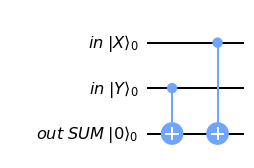

In [2]:
X = QuantumRegister(1, "in |X⟩")
Y = QuantumRegister(1, "in |Y⟩")
sum_out = QuantumRegister(1, "out SUM |0⟩")
SUM = QuantumCircuit(X, Y, sum_out, name='SUM')
SUM.cx(1, 2)
SUM.cx(0, 2)
fig = SUM.draw('mpl', True)
SUM = SUM.to_instruction() #converts circuit to quantum gate compatible with classical bits
fig

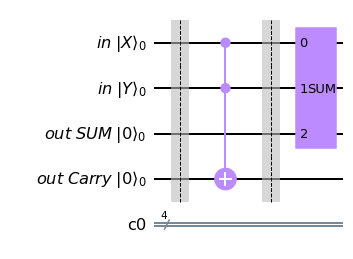

In [3]:
c = ClassicalRegister(4)
cout = QuantumRegister(1, 'out Carry |0⟩')
half_adder = QuantumCircuit(X, Y, sum_out, cout, c)

half_adder.barrier()
half_adder.ccx(0, 1, 3)
half_adder.barrier()
half_adder.append(SUM, [0, 1, 2])
fig = half_adder.draw('mpl', True)
half_adder.measure(X, c[3])
half_adder.measure(Y, c[2])
half_adder.measure(sum_out, c[1])
half_adder.measure(cout ,c[0])
fig

In [4]:
def TruthTable(t, cirq):
    for i in range(2,6):
        print(str(execute(t.compose(cirq),Aer.get_backend('qasm_simulator')).result().get_counts())[i],end = "")
    print("")

In [5]:
print("ABSC")
temp = QuantumCircuit(X, Y, sum_out, cout, c)
TruthTable(temp, half_adder)
temp = QuantumCircuit(X, Y, sum_out, cout, c)
temp.x(0)
TruthTable(temp, half_adder)
temp = QuantumCircuit(X, Y, sum_out, cout, c)
temp.x(1)
TruthTable(temp, half_adder)
temp = QuantumCircuit(X, Y, sum_out, cout, c)
temp.x(0)
temp.x(1)
TruthTable(temp, half_adder)
print("\nHalf Adder Truth Table")

ABSC
0000
1010
0110
1101

Half Adder Truth Table
